In [2]:
import pandas as pd
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
load_dotenv()


True

## Import dataset

In [3]:
DATASET_URL = os.getenv("DATASET_URL")
datasetFull = pd.read_csv(DATASET_URL)
datasetFull.convert_dtypes()

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281
...,...,...,...,...,...,...,...,...
7245517,35448190,9,2.5,SOINS DU CORPS,CORPS_SOIN DES MAINS,CORPS_HYDRA_NOURRI_ET_SOINS,SVC CR MAINS ET ONGLES T75ml,997385337
7245518,35448190,9,3.0,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 LAVANDIN DE PROVENCE 200ML,997385337
7245519,36105678,12,7.9,MAQUILLAGE,MAQ_YEUX Crayons,MAQ_YEUX_CLASSIQUE,CRAYON REGARD PRUNE CN3 1.3G,997385337
7245520,36105678,12,11.45,MAQUILLAGE,MAQ_YEUX Mascara Elixir,MAQ_YEUX_MASCA_HG,MASCARA SOIN NOIR01 2014 CN3 9ML,997385337


## Fonction de scale pour dataset panda

In [5]:
# remove null from dataset and return a scale of dataset
def saplte_first_prows(data, perc):
    data.dropna(axis=0, inplace=True)
    return data.head(int(len(data)*(perc)))

In [6]:

df = saplte_first_prows(datasetFull, 1)

df.head()

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281


## Nombre de tuple du dataset avant scale

In [7]:
datasetFull.shape

(7245522, 8)

## Nombre de tuple du dataset scale

In [8]:
df.shape

(7245522, 8)

## Nombre de clients, produits, tickets

In [94]:
def plotNumber(labels, values, colors=['tab:red', 'tab:blue', 'tab:orange']):
    fig, ax = plt.subplots()

    # ax.bar(labels, values, color=colors)
    # ax.bar(labels, values, label=labels, color=colors)
    
    p1 = ax.bar(labels, values, 0.35, color=colors)
    ax.bar_label(p1, label_type='center')

    ax.set_ylabel('Quantité (Milliers)')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)/1000, ',')))
    # ax.set_title('Fruit supply by kind and color')
    # ax.legend(title='Couleur label')

    plt.show()

1484


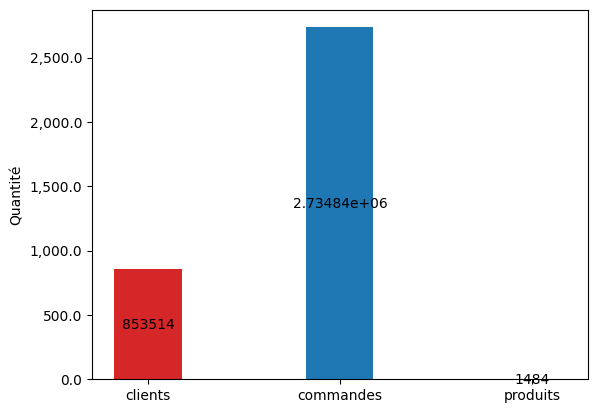

In [95]:
nbClient = len(df['CLI_ID'].unique())
nbTicket = len(df['TICKET_ID'].unique())
nbProduit = len(df['LIBELLE'].unique())
nbFamille = len(df['FAMILLE'].unique())


labels = ['clients', 'tickets']
values = [nbClient, nbTicket]
plotNumber(labels=['clients', 'commandes', 'produits'], values=[nbClient, nbTicket, nbProduit])

In [10]:
# print('Nb client avec 1 ticket : ', len(df.groupby(['CLI_ID', 'TICKET_ID']).filter(lambda x: len(x) == 1)))
# print('Nb client avec 2 tickets : ', len(df.groupby(['CLI_ID', 'TICKET_ID']).filter(lambda x: len(x) == 2)))
# print('Nb client avec 3 tickets : ', len(df.groupby(['CLI_ID', 'TICKET_ID']).filter(lambda x: len(x) == 3)))
# print('Nb client avec 4 tickets : ', len(df.groupby(['CLI_ID', 'TICKET_ID']).filter(lambda x: len(x) == 4)))
# print('Nb client avec 5 tickets : ', len(df.groupby(['CLI_ID', 'TICKET_ID']).filter(lambda x: len(x) == 5)))
# print('Nb client avec 6 tickets : ', len(df.groupby(['CLI_ID', 'TICKET_ID']).filter(lambda x: len(x) == 6)))
# print('Nb client avec 7 tickets : ', len(df.groupby(['CLI_ID', 'TICKET_ID']).filter(lambda x: len(x) == 7)))
# print('Nb client avec 8 tickets : ', len(df.groupby(['CLI_ID', 'TICKET_ID']).filter(lambda x: len(x) == 8)))
# print('Nb client avec 9 tickets : ', len(df.groupby(['CLI_ID', 'TICKET_ID']).filter(lambda x: len(x) == 9)))
# print('Nb client avec 10+ tickets : ', len(df.groupby(['CLI_ID', 'TICKET_ID']).filter(lambda x: len(x) >= 10)))


## Prix min, max et moyen des produits

In [11]:
p_min = df["PRIX_NET"].min()
p_max = df["PRIX_NET"].max()
p_moyen = df["PRIX_NET"].mean()
total = df["PRIX_NET"].sum()

print('Prix min : ', p_min)
print('Prix moyen : ', p_moyen)
print('Prix max : ', p_max)
print('Total de tout les tickets : ', total)
df.loc[df["PRIX_NET"] == p_max]


Prix min :  0.01
Prix moyen :  5.970083615783657
Prix max :  1575.0
Total de tout les tickets :  43256372.18000003


,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
5085421,33107984,1,1575.0,PARFUMAGE,PARF_PARF ET EAU DE PARF,PARF_PARFUM,EDP EVIDENCE VAPO 100ML,990122959


## Max, Min, Moyenne de commande par client 

In [12]:
comm_max = df["CLI_ID"].value_counts().max()
comm_min = df["CLI_ID"].value_counts().min()
comm_moyen = df["CLI_ID"].value_counts().mean()

print('Nb de commande min : ', comm_min)
print('Nb de commande moyen : ', comm_moyen)
print('Nb de commande max : ', comm_max)


Nb de commande min :  1
Nb de commande moyen :  8.489048802948751
Nb de commande max :  834


## Client ayant le plus dépensé

In [13]:
df.groupby("CLI_ID").agg({"PRIX_NET": "sum"}).sort_values(by='PRIX_NET', ascending=False).head(1)

,PRIX_NET
CLI_ID,
967051620,13536.95


## Commande la plus chère

In [14]:
dfprix = df.groupby("TICKET_ID")["PRIX_NET"].sum().reset_index()
dfprix.loc[dfprix["PRIX_NET"].idxmax()]

TICKET_ID    33107984.0
PRIX_NET         3486.0
Name: 136287, dtype: float64

In [15]:
df.loc[df["TICKET_ID"] == 33107984]

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
5085418,33107984,1,486.0,PARFUMAGE,PARF_EAUX HOMMES,PARF_HOMME,EDT EVIDENCE HOMME VAPO 75ML,990122959
5085419,33107984,1,1012.5,PARFUMAGE,PARF_PARF ET EAU DE PARF,PARF_PARFUM,2013COL 10ANS EDP50ML COMMEUNE EVIDENCE,990122959
5085420,33107984,1,412.5,HYGIENE,HYG_DEO PARFUMS,HYG_PARFUMEE,DEO PARFUME 100ML EVIDENCE,990122959
5085421,33107984,1,1575.0,PARFUMAGE,PARF_PARF ET EAU DE PARF,PARF_PARFUM,EDP EVIDENCE VAPO 100ML,990122959


## CA par mois

In [96]:
df.groupby("MOIS_VENTE").agg({"PRIX_NET": "sum"})["PRIX_NET"]

MOIS_VENTE
1     3922441.38
2     2845321.40
3     3200551.14
4     3109273.54
5     3769628.89
6     4118695.03
7     4209609.93
8     2951500.23
9     3258067.86
10    2997736.24
11    3485610.32
12    5387936.22
Name: PRIX_NET, dtype: float64

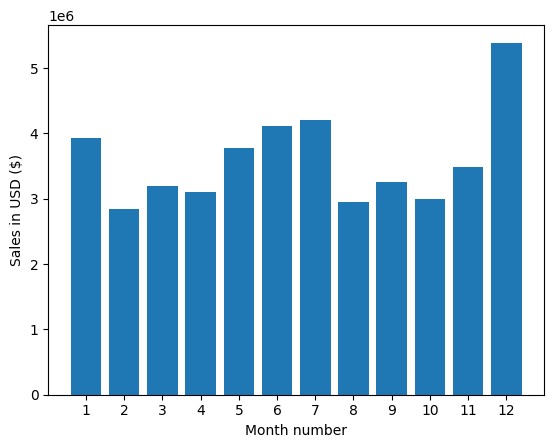

In [99]:
months = range(1,13)
plt.bar(months,df.groupby("MOIS_VENTE").agg({"PRIX_NET": "sum"})["PRIX_NET"])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

## Nombre d'item par maille, univers, famille

In [18]:
df.groupby('MAILLE').LIBELLE.nunique()

MAILLE
CAPILLAIRE_AUTRE                24
CAPILLAIRE_SHAMPOING            29
CORPS_HYDRA_NOURRI_ET_SOINS     49
CORPS_HYDR_LAIT_HUILE           64
CORPS_MONOI                      6
CORPS_SPA_ET_MINCEUR            24
DIETETIQUE                       1
HYG_AUTRES                      18
HYG_CULTUREBIO                   6
HYG_HOMME                       22
HYG_JDM                         41
HYG_MONOI_ET_EDIT_SPEC          21
HYG_PARFUMEE                    32
HYG_PLAISIRNAT_BAIN_SAVON       89
MAQ_AUTRE                       12
MAQ_LEV_BASPRIX                 58
MAQ_LEV_RAL_HMG                106
MAQ_ONGLES                     119
MAQ_TEINT                      138
MAQ_YEUX_CLASSIQUE              72
MAQ_YEUX_MASCA_EYEL_FARD       181
MAQ_YEUX_MASCA_HG                6
MULTIFAMILLES                    1
PARF_EDT                        35
PARF_HOMME                      10
PARF_PARFUM                     76
SOLAIRE                         28
VIS_AAAR_DEMAQLOTION             9
VIS_AAAR_HORS

In [19]:
df.groupby('UNIVERS').LIBELLE.nunique()

UNIVERS
CAP_AP SHAMP                    6
CAP_SHAMP SPECIFIQUE           10
CAP_SHAMP TRAITANT              4
CAP_SHAMP TSCHEVEUX            15
CAP_TENUE DE LA COIFFURE        6
                               ..
VIS_SOIN HOMMES                11
VIS_SOIN LEVRES                30
VIS_TRAIT AAAR                 19
VIS_TRAIT BIO                   3
VIS_TRAIT Jeunes Specifique    10
Name: LIBELLE, Length: 105, dtype: int64

In [145]:
famille = df.groupby('FAMILLE').LIBELLE.nunique()

FAMILLE
CAPILLAIRES         53
HYGIENE            229
MAQUILLAGE         692
MULTI FAMILLES       1
PARFUMAGE          121
SANTE NATURELLE      1
SOINS DU CORPS     143
SOINS DU VISAGE    216
SOLAIRES            28
Name: LIBELLE, dtype: int64

In [2]:


# print(np.full_like(0, 0, shape=len(famille)))
famille.plot(kind='pie',
            # explode=[0,0,0.2,0,0,0,0,0,0],
            autopct=lambda x: '{:.0f}'.format(x*((famille.sum()/100)*100/famille.sum())) , 
            # labeldistance = 1.8,
            shadow=True,
            radius=1.5)

NameError: name 'famille' is not defined

## Item le plus populaire par catégorie 

In [21]:
df.groupby('FAMILLE')['LIBELLE'].apply(lambda x: x.value_counts().head(1)).reset_index().rename(columns={"level_1": "LIBELLE", "LIBELLE": "VENTE"})

,FAMILLE,LIBELLE,VENTE
0,CAPILLAIRES,SVC PURETE SH 300 ML,20105
1,HYGIENE,GD JDM4 LOTUS FL200ML,85914
2,MAQUILLAGE,PORTE MINE NOIR 01 CN3 0.3G,63371
3,MULTI FAMILLES,2010 KIT MAQ PDR,30
4,PARFUMAGE,FRAICHEUR CHEVREF EDC 125ML,40188
5,SANTE NATURELLE,SOIN COSM ORALE 3X10 CAPS RC2,1
6,SOINS DU CORPS,SVC CREME QUOTIDIENNE T75ml,72394
7,SOINS DU VISAGE,DEMAQ EXPRESS PUR BLEUET FL125ML,158762
8,SOLAIRES,LAIT 3EN1 PROTECTYL AP SOL FL150,61617


## Prix moyen des items dans chaque catégorie

In [22]:
df['PRIX_NET'] = df['PRIX_NET'].astype(int)
df.groupby('FAMILLE')['PRIX_NET'].mean()

FAMILLE
CAPILLAIRES         3.295194
HYGIENE             2.211319
MAQUILLAGE          5.905549
MULTI FAMILLES      4.300000
PARFUMAGE          12.986298
SANTE NATURELLE    14.000000
SOINS DU CORPS      4.856280
SOINS DU VISAGE     6.399597
SOLAIRES            6.899813
Name: PRIX_NET, dtype: float64

## Ticket prix moyen dépensé

In [24]:
dfprix["PRIX_NET"].mean()

15.81677771395118

## Nombre moyen d'item par ticket

In [29]:
df["TICKET_ID"].value_counts().mean()

2.6493393948679285